In [87]:
import pandas as pd
import numpy as np

In [88]:
def load_data():
    cols=['BALANCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE']
    df = pd.read_csv("data/CC GENERAL.csv", usecols=cols, index_col=False, dtype=np.float64)
    return df


In [89]:
df = load_data()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null float64
PURCHASES_TRX                       8950 non-null float64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS                    8637 non-null float64
PRC_FULL_PAYMENT       

In [90]:
df = df.dropna()
df_min = df.min()

df_n = (df - df_min) / (df.max() - df_min)
df_s = (df - df.mean()) / (df.std())

df_n.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,0.084084,0.895035,0.020910,0.014840,0.018704,0.021091,0.496000,0.205909,0.368820,0.091736,0.026942,0.041992,0.149319,0.035181,0.011312,0.159304,0.922398
std,0.110043,0.207697,0.044191,0.041321,0.040766,0.045006,0.401273,0.300054,0.398093,0.134528,0.056199,0.070337,0.122178,0.057368,0.031052,0.296271,0.218497
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.007777,0.909091,0.000884,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.002793,0.051753,0.008251,0.002214,0.000000,1.000000
50%,0.048146,1.000000,0.007655,0.001104,0.004213,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,0.019553,0.098497,0.017677,0.004089,0.000000,1.000000
75%,0.110549,1.000000,0.023368,0.014698,0.021518,0.024023,0.916667,0.333333,0.750000,0.166667,0.032520,0.050279,0.215359,0.038467,0.010804,0.166667,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [91]:
df_s.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03
mean,-8.820077e-16,-3.937769e-14,-1.678447e-15,-5.232807e-16,5.759378e-16,4.623958e-16,-1.819964e-15,-7.483901e-15,1.963125e-15,-7.781332e-15,3.455627e-17,-1.810090e-17,1.118965e-16,-2.632859e-17,6.351772e-16,-3.764988e-15,7.898576e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-7.640995e-01,-4.309334e+00,-4.731808e-01,-3.591395e-01,-4.588125e-01,-4.686284e-01,-1.236067e+00,-6.862398e-01,-9.264679e-01,-6.819130e-01,-4.794091e-01,-5.970196e-01,-1.222136e+00,-6.132457e-01,-3.642831e-01,-5.376958e-01,-4.221556e+00
25%,-6.934289e-01,6.767501e-02,-4.531691e-01,-3.591395e-01,-4.588125e-01,-4.686284e-01,-1.028396e+00,-6.862398e-01,-9.264679e-01,-6.819130e-01,-4.794091e-01,-5.573063e-01,-7.985513e-01,-4.694186e-01,-2.929913e-01,-5.376958e-01,3.551601e-01
50%,-3.265789e-01,5.053754e-01,-2.999522e-01,-3.324252e-01,-3.554759e-01,-4.686284e-01,9.968284e-03,-4.085128e-01,-5.078044e-01,-6.819130e-01,-4.794091e-01,-3.190264e-01,-4.159582e-01,-3.051066e-01,-2.325974e-01,-5.376958e-01,3.551601e-01
75%,2.404933e-01,5.053754e-01,5.562534e-02,-3.444405e-03,6.901532e-02,6.514857e-02,1.048332e+00,4.246716e-01,9.575142e-01,5.569899e-01,9.925221e-02,1.178202e-01,5.405245e-01,5.727659e-02,-1.635717e-02,2.485352e-02,3.551601e-01
max,8.323226e+00,5.053754e-01,2.215586e+01,2.384145e+01,2.407116e+01,2.175062e+01,1.256004e+00,2.646498e+00,1.585508e+00,6.751505e+00,1.731443e+01,1.362035e+01,6.962622e+00,1.681794e+01,3.183974e+01,2.837593e+00,3.551601e-01


In [92]:
from sklearn.cluster import KMeans

In [93]:
def alpha_k(k, dim):
    if k == 2 and dim > 1:
        return 1.0 - 3.0 / (4.0 * dim)
    elif k > 2 and dim > 1:
        ak1 = alpha_k(k - 1, dim)
        return ak1 + (1.0 - ak1) / 6.0
    else:
        return 1.0

In [94]:
def cluster_eval(s_k, k, dim):
    if k == 1:
        return 1.0
    elif s_k[k-1] != 0.0:
        return s_k[k] / (alpha_k(k, dim) * s_k[k-1])
    else:
        return 1.0

In [95]:
def calculate_f_k(df,max_k):
    s_k = np.zeros(max_k)
    f_k = np.zeros(max_k)
    
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42).fit(df)
        s_k[k-1] = kmeans.inertia_
        
    f_k[0] = 1.0
    for k in range(2, max_k + 1):
        f_k[k-1] = cluster_eval(s_k, k-1, len(df.columns))
    
    return f_k

In [96]:
def estimate_k(df, max_k):
    f_k = calculate_f_k(df, max_k)
    return np.argmin(f_k) + 1

In [97]:
%matplotlib inline
import matplotlib.pyplot as plt

t = np.arange(1, 21)
f_k = calculate_f_k(df_s, 20)

f_k

array([1.        , 1.        , 0.91720717, 0.91868422, 0.95287222,
       0.94896787, 0.95600042, 0.95304787, 0.95134319, 0.96325516,
       0.9682018 , 0.97222987, 0.97095243, 0.9776719 , 0.97535244,
       0.97579506, 0.98589334, 0.97617644, 0.98523734, 0.97467497])

In [98]:
t

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

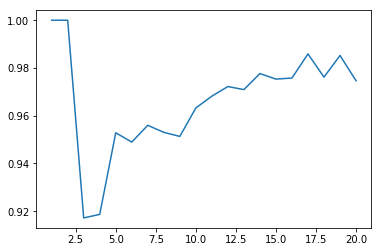

In [99]:
fig, ax1 = plt.subplots()
ax1.plot(t, f_k)

In [100]:
np.argmin(f_k) + 1

3